# Investigate mixing processes in accretor models
author: [Mathieu Renzo](mailto:mrenzo@flatironinstitute.org)

In [2]:
import sys
# the line below import stuff from git@github.com:mathren90/plotFunc.git
sys.path.append('/mnt/home/mrenzo/codes/python_stuff/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
%matplotlib inline
from plotDefaults import *
# plot_aux defines many auxiliary functions to make plots
from plot_aux import *

In [3]:
set_plotDefaults()

done in plotDefaults.py


In [4]:
# root folder for best model
folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/exponential_ov"
binary = folder+"/binary_to_donor_Hedepl/"
accretor = folder+"/accretor_to_TAMS/"
dhfile = binary+"/LOGS1/history.data"
hfile1 = binary+'/LOGS2/history.data'
hfile2 = accretor+'/LOGS/history.data'
bfile = binary+'/binary_history.data'
model_name = folder.split('/')[-2].replace('_','\_')
print(model_name)

M1\_25\_M2\_17\_P100\_Z0.01


['line', 'time', 'mass', 'lg(L)', 'lg(Teff)', '1H_surf', '4He_surf', '12C_surf', '13C_surf', '14N_surf', '16O_surf', '17O_surf', '18O_surf', '20Ne_surf', '22Ne_surf', '26Al_surf', 'Mcc/Mt', 'lg(Teff)', 'lg(Md)', 'lg(rhoc)', 'lg(Tc)', '1H_cen', '4He_cen', '12C_cen', '13C_cen', '14N_cen', '16O_cen', '17O_cen', '18O_cen', '20Ne_cen', '22Ne_cen', '26Al_cen', 'Omeg_surf', 'Omeg_cen', 'Rp/Req', 'Md/Md(0)', 'v_crit1', 'v_crit2', 'v_equa', 'Om/Om_cr', 'Gamma_Ed', 'lg(Mdot_mech)', 'L_tot']
['line', 'time', 'mass', 'lg(L)', 'lg(Teff)', '1H_surf', '4He_surf', '12C_surf', '13C_surf', '14N_surf', '16O_surf', '17O_surf', '18O_surf', '20Ne_surf', '22Ne_surf', '26Al_surf', 'Mcc/Mt', 'lg(Teff)', 'lg(Md)', 'lg(rhoc)', 'lg(Tc)', '1H_cen', '4He_cen', '12C_cen', '13C_cen', '14N_cen', '16O_cen', '17O_cen', '18O_cen', '20Ne_cen', '22Ne_cen', '26Al_cen', 'Omeg_surf', 'Omeg_cen', 'Rp/Req', 'Md/Md(0)', 'v_crit1', 'v_crit2', 'v_equa', 'Om/Om_cr', 'Gamma_Ed', 'lg(Mdot_mech)', 'L_tot']


Text(0, 0.5, '$\\log_{10}(X(^{14}\\mathrm{N})/X(^{12}\\mathrm{C}))$')

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)
/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


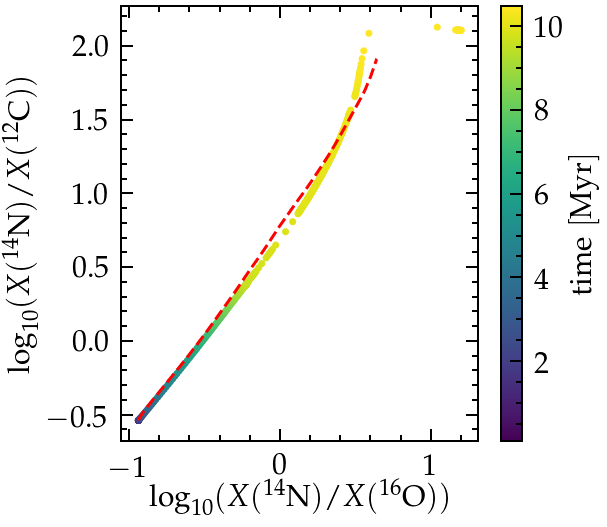

In [4]:
# play with Geneva model
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])


file_geneva = "../data/geneva_models/M020Z14V4.dat"
src = np.genfromtxt(file_geneva, skip_header=2)
with open(file_geneva, "r") as f:
    for i, line in enumerate(f):
        if i==0:
            col = line.split()
            print(col)
        break
c12_surf = src[:, col.index('12C_surf')]
n14_surf = src[:, col.index('14N_surf')]
o16_surf = src[:, col.index('16O_surf')]
t = src[:, col.index('time')]*1e-6


x = np.log10(n14_surf/o16_surf)
y = np.log10(n14_surf/c12_surf)

p = ax.scatter(x, y, c=t)


# now non-rotating
file_geneva = "../data/geneva_models/M020Z14V0.dat"
src = np.genfromtxt(file_geneva, skip_header=2)
with open(file_geneva, "r") as f:
    for i, line in enumerate(f):
        if i==0:
            col = line.split()
            print(col)
        break
c12_surf = src[:, col.index('12C_surf')]
n14_surf = src[:, col.index('14N_surf')]
o16_surf = src[:, col.index('16O_surf')]
t = src[:, col.index('time')]*1e-6

x = np.log10(n14_surf/o16_surf)
y = np.log10(n14_surf/c12_surf)

# ax.scatter(x, y, label="20, 0 geneva", c=t)
ax.plot(x, y, c='r', ls='--')
fig.colorbar(p, label="$\mathrm{time\ [Myr]}$")
ax.set_xlabel(r"$\log_{10}(X(^{14}\mathrm{N})/X(^{16}\mathrm{O}))$")
ax.set_ylabel(r"$\log_{10}(X(^{14}\mathrm{N})/X(^{12}\mathrm{C}))$")

(0, 3)

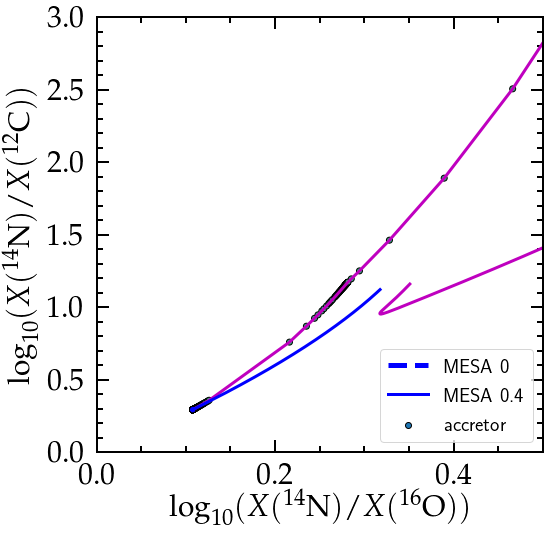

In [10]:
# surface abundances evolution
# inspired by Fig. 8 in Bouret et al. 2021
# but we use mass fractions not number fractions
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

src1, col1 = getSrcCol(hfile1)
src2, col2 = getSrcCol(hfile2)

mass = np.concatenate((src1[:, col1.index("star_mass")], src2[:, col2.index("star_mass")]))
time = np.concatenate((src1[:, col1.index("star_age")], src2[:, col2.index("star_age")]))*1e-6

src, col = getSrcCol(bfile)
rl_relative_gap_1 = src[:, col.index("rl_relative_overflow_1")]
ind = rl_relative_gap_1 > 0
t_RLOF = src[ind, col.index("age")]*1e-6
RLOF_init = min(t_RLOF)
RLOF_end = max(t_RLOF)

# get surface CNO mass fraction
surface_n14 = np.concatenate((src1[:, col1.index("surface_n14")], src2[:, col2.index("surface_n14")]))
surface_c12 = np.concatenate((src1[:, col1.index("surface_c12")], src2[:, col2.index("surface_c12")]))
surface_o16 = np.concatenate((src1[:, col1.index("surface_o16")], src2[:, col2.index("surface_o16")]))
# surface_h = np.concatenate((src1[:, col1.index("surface_h1")], src2[:, col2.index("surface_h1")]))

log_N_div_O = np.log10(surface_n14/surface_o16)
log_N_div_C = np.log10(surface_n14/surface_c12)

ax.plot(10**log_N_div_O, 10**log_N_div_C, c='m')
ax.scatter(10**log_N_div_O[(time>RLOF_init) & (time< RLOF_end)], 10**log_N_div_C[(time>RLOF_init) & (time< RLOF_end)],c=time[(time>RLOF_init) & (time< RLOF_end)], edgecolor='k',label=r"accretor", vmin=0, vmax=max(time))

# add zeta Ophiuchi
c, err_c = get_zeta_oph_surface_c()
o, err_o = get_zeta_oph_surface_o()
n, err_n =  get_zeta_oph_surface_n()

n_div_c = n/c
err_n_div_c = (err_n/n +err_c/c)*n_div_c
log_n_div_c = np.log10(n_div_c)
err_log_n_div_c = err_n_div_c/(n_div_c*np.log(10))



n_div_o = n/o
err_n_div_o = (err_n/n +err_o/o)*n_div_o
log_n_div_o = np.log10(n_div_o)
err_log_n_div_o = err_n_div_o/(n_div_o*np.log(10))

#ax.errorbar(10**log_n_div_o, 10**log_n_div_c, xerr=[err_log_n_div_o], yerr=[err_log_n_div_c], c='r', marker='o')


# --------------------------------------------------------------------
# overplot single star models

# non-rotating
src, col = getSrcCol('/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/non_rot/LOGS/history.data')
surface_n14 = src[:, col.index("surface_n14")]
surface_c12 = src[:, col.index("surface_c12")]
surface_o16 = src[:, col.index("surface_o16")]
# surface_h = src[:, col.index("surface_h1")]

log_N_div_O = np.log10(surface_n14/surface_o16)
log_N_div_C = np.log10(surface_n14/surface_c12)

ax.plot(10**log_N_div_O, 10**log_N_div_C, c='b', ls='--', lw=5, label="MESA 0")

# rotating
src, col = getSrcCol('/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/history.data')
surface_n14 = src[:, col.index("surface_n14")]
surface_c12 = src[:, col.index("surface_c12")]
surface_o16 = src[:, col.index("surface_o16")]
# surface_h = src[:, col.index("surface_h1")]

log_N_div_O = np.log10(surface_n14/surface_o16)
log_N_div_C = np.log10(surface_n14/surface_c12)

ax.plot(10**log_N_div_O, 10**log_N_div_C, c='b', ls='-', label="MESA 0.4")

# --------------------------------------------------------------------
# # overplot geneva model
# file_geneva = "../data/geneva_models/M020Z14V4.dat"
# src = np.genfromtxt(file_geneva, skip_header=2)
# with open(file_geneva, "r") as f:
#     for i, line in enumerate(f):
#         if i==0:
#             col = line.split()
#             print(col)
#         break
# c12_surf = src[:, col.index('12C_surf')]
# n14_surf = src[:, col.index('14N_surf')]
# o16_surf = src[:, col.index('16O_surf')]


# x = np.log10(n14_surf/o16_surf)
# y = np.log10(n14_surf/c12_surf)
# ax.plot(x, y, label="20, 0.4 geneva", zorder=0, c='k')

# # over plot geneva model non-rotating
# file_geneva = "../data/geneva_models/M020Z14V0.dat"
# src = np.genfromtxt(file_geneva, skip_header=2)
# with open(file_geneva, "r") as f:
#     for i, line in enumerate(f):
#         if i==0:
#             col = line.split()
#             print(col)
#         break
# c12_surf = src[:, col.index('12C_surf')]
# n14_surf = src[:, col.index('14N_surf')]
# o16_surf = src[:, col.index('16O_surf')]

# x = np.log10(n14_surf/o16_surf)
# y = np.log10(n14_surf/c12_surf)
# ax.plot(x, y, label="20, 0 geneva", zorder=0, c='k', ls='--', lw=5)
# --------------------------------------------------------------------

ax.set_xlabel(r"$\log_{10}(X(^{14}\mathrm{N})/X(^{16}\mathrm{O}))$")
ax.set_ylabel(r"$\log_{10}(X(^{14}\mathrm{N})/X(^{12}\mathrm{C}))$")
ax.legend(frameon=True, loc="lower right", fontsize=20)
# fig.colorbar(p, label="$\mathrm{time\ [Myr]}$")
ax.set_xlim(0,0.5)
ax.set_ylim(0,3)


670 7.315741583257507
714 7.7961783439490455
533 5.819836214740674
701 7.654231119199273
663 7.239308462238399
677 7.3921747042766155
332 3.6251137397634214
664 7.250227479526843
462 5.044585987261147
664 7.250227479526843
664 7.250227479526843
696 7.5996360327570525
665 7.261146496815287
665 7.261146496815287
163 1.7797998180163788
1029 11.235668789808917
734 8.014558689717926
980 10.70063694267516
858 9.368516833484987
714 7.7961783439490455
873 9.532302092811648
730 7.97088262056415
714 7.7961783439490455
1022 11.15923566878981
714 7.7961783439490455
1024 11.181073703366698
991 10.820746132848045
714 7.7961783439490455
996 10.875341219290265
962 10.504094631483166
1010 11.028207461328481
844 9.21565059144677
772 8.4294813466788
768 8.385805277525023
777 8.48407643312102
764 8.342129208371247
985 10.75523202911738
1016 11.093721565059145
784 8.560509554140127
839 9.16105550500455
984 10.744313011828936
749 8.178343949044587
805 8.789808917197453
717 7.828935395814377
796 8.6915377616

900 9.827115559599637
878 9.586897179253867
714 7.7961783439490455
1020 11.137397634212922
753 8.222020018198362
999 10.908098271155596
987 10.777070063694268
925 10.100090991810738
813 8.877161055505006
715 7.807097361237489
939 10.252957233848955
854 9.324840764331212
982 10.722474977252048
822 8.975432211101001
883 9.641492265696089
994 10.853503184713377
1026 11.202911737943586
835 9.117379435850774
792 8.64786169244768
863 9.423111919927207
788 8.604185623293905
760 8.298453139217472
894 9.761601455868972
997 10.886260236578709
981 10.711555959963604
826 9.019108280254777
889 9.707006369426752
1009 11.017288444040037
932 10.176524112829846
745 8.134667879890811
1028 11.224749772520473
993 10.842584167424933
1005 10.973612374886262
714 7.7961783439490455
1029 11.235668789808917
1012 11.050045495905369
918 10.023657870791629
912 9.958143767060966
716 7.818016378525933
1007 10.99545040946315
745 8.134667879890811
817 8.920837124658782
978 10.678798908098273
756 8.254777070063694
741 

723 7.894449499545042
1029 11.235668789808917
800 8.735213830755233
989 10.798908098271156
780 8.516833484986352
906 9.8926296633303
954 10.416742493175615
1002 10.940855323020928
809 8.833484986351229
719 7.850773430391265
868 9.477707006369428
830 9.062784349408554
971 10.602365787079163
714 7.7961783439490455
1000 10.91901728844404
849 9.27024567788899
726 7.927206551410373
715 7.807097361237489
738 8.058234758871702
776 8.473157415832576
1014 11.071883530482257
1e+99 -1e+99


(1e-08, 0.01)

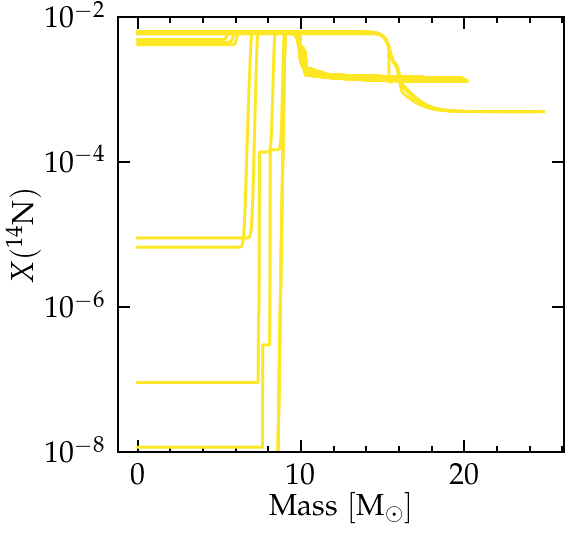

In [51]:
# N profiles in time
profiles = glob.glob(binary+'LOGS1/profile*.data')+glob.glob(accretor+'/LOGS/profile*.data')
# print(profiles)

fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

vmin = 0
vmax = 12 # max age considered in Myrs

intervals = np.linspace(vmin, vmax, 1100)
rainbow = mpl.cm.viridis(intervals)


for profile in profiles:
    src, col = getSrcCol(profile)
    # read header
    with open(profile, 'r') as f:
        for i, line in enumerate(f):
            if i == 1:
                header_cols = line.split()
                # print(header_cols)
            if i == 2:
                header_data = line.split()
                break
    age = float(header_data[header_cols.index('star_age')])*1e-6
    j = np.argmin(np.absolute(intervals-age))
    print(j, intervals[j])
    color = rainbow[j]

    
    n = src[:, col.index("n14")]
    m = src[:, col.index("mass")]
    ax.plot(m, n, lw=3, c=color)

ax.set_xlabel(r"$\mathrm{Mass \ [M_\odot]}$")
ax.set_ylabel(r"$X(^{14}\mathrm{N})$")

ax.set_yscale('log')
ax.set_ylim(1e-8, 1e-2)

In [4]:
def convert_mass_fraction_to_number_fraction(X, A, M):
    """
    converts the mass fraction of an element into its number fraction
    X = input mass fraction
    A = atomic weight of the element
    M = total mass of the star in solar masses
    """
    mp = 1.67262192369e-24# proton mass in grams
    dq_surf = 1e-8  # the default in MESA is to average surface abundances over dq=1d-8, see surface_avg_abundance_dq
    M_surf = dq_surf*M*Msun
    N = M_surf*X/(A*mp)
    return N


NameError: name 'X' is not defined